In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
NO2 = pd.read_csv("../csv/pollution_province/NO2_2019.csv")
NO2.drop(NO2.index[(NO2['Valore medio annuo³ [µg/m³]'] == 'n.d.')], inplace=True)
NO2.drop(['region_id',
          'province_id',
          'municipality_id',
          'station_code',
          'Nome della stazione',
          'Tipo di stazione²',
          'codice zona',
          'Tipo di area¹',
          'Rendimento [%]',
          'Numero di dati validi',
          'nome zona',
          'tipo di zona',
          'Comune',
          'Regione'
        ], axis=1, inplace=True)
NO2['Valore medio annuo³ [µg/m³]'] = NO2['Valore medio annuo³ [µg/m³]'].apply(int)
NO2['Over'] = NO2['Over'].apply(int)
NO2 = NO2.groupby(by='Provincia').max()


PM10 = pd.read_csv("../csv/pollution_province/PM10_2019.csv")
PM10.drop(PM10.index[(PM10['Valore medio annuo³ [µg/m³]'] == '-')], inplace=True)
PM10.drop(['region_id',
            'province_id',
            'municipality_id',
            'station_code',
            'Nome della stazione',
            'Tipo di stazione²',
            'Rendimento [%]',
            'Comune',
            'Regione',
            'Rispetta copertura minima',
            "sufficiente distribuzione temporale nell'anno",
            'numero_dati_validi',
            'TIPO DI DATI 4',
            'Codice zona',
            'Nome zona',
            'Tipo di zona¹'
        ], axis=1, inplace=True)
PM10['Valore medio annuo³ [µg/m³]'] = PM10['Valore medio annuo³ [µg/m³]'].apply(int)
PM10 = PM10.groupby(by='Provincia').mean()

PM25 = pd.read_csv("../csv/pollution_province/PM25_2019.csv")
PM25.drop(PM10.index[(PM10['Valore medio annuo³ [µg/m³]'] == '-')], inplace=True)
PM25.drop(['region_id',
            'province_id',
            'municipality_id',
            'station_code',
            'Nome della stazione',
            'Tipo di stazione²',
            'Rendimento [%]',
            'Comune',
            'Regione',
            'Rispetta copertura minima',
            "sufficiente distribuzione temporale nell'anno",
            'numero_dati_validi',
            'TIPO DI DATI 4',
            'Codice zona',
            'Nome zona'
        ], axis=1, inplace=True)
PM25['Valore medio annuo³ [µg/m³]'] = PM10['Valore medio annuo³ [µg/m³]'].apply(int)
PM25 = PM10.groupby(by='Provincia').mean()

/home/marco/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
infections = pd.read_csv("../csv/dpc-covid19-ita-province.csv", low_memory=False)
infection_rate = pd.DataFrame({'province':[],'infection_rate':[]})

for city in infections['denominazione_provincia'].unique():
    # Only get days when there have been infected people
    subset = infections[(infections['denominazione_provincia'] == city) & (infections['totale_casi'] > 0)].sort_values('data')
  
    # Mean value of the differences between consecutive points
    city_infection_rate =  np.mean(subset['totale_casi'].diff(1))
    infection_rate = infection_rate.append(pd.DataFrame({'province':[city],'infection_rate':[city_infection_rate]}))
infection_rate

,province,infection_rate
0,L'Aquila,41.325942
0,Teramo,37.800439
0,Pescara,40.046563
0,Chieti,42.806236
0,In fase di definizione/aggiornamento,0.165898
...,...,...
0,Treviso,173.401747
0,Venezia,151.305677
0,Padova,177.329694
0,Rovigo,30.893570


In [8]:
import numpy as np
from scipy import stats
#NO2 INFECTION MERGE
NO2_infections = pd.merge(NO2,infection_rate,left_on=['Provincia'],right_on=['province'])
#PM10 INFECTION MERGE
PM10_infections = pd.merge(PM10, infection_rate, left_on=['Provincia'], right_on=['province'])
#PM2.5 INFECTION MERGE
PM25_infections = pd.merge(PM25, infection_rate, left_on=['Provincia'], right_on=['province'])


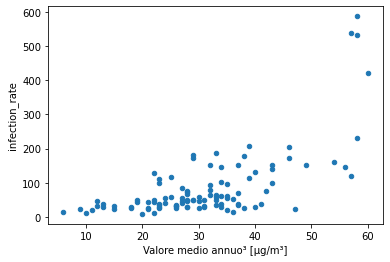

SpearmanrResult(correlation=0.5861709346787326, pvalue=6.260712838089721e-11)
(0.6609608744924736, 2.250305407918895e-14)
KendalltauResult(correlation=0.4368342693563568, pvalue=8.092069796676477e-11)


In [9]:
#NO2/COVID CORRELATION
NO2_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))
print(stats.pearsonr(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))
print(stats.kendalltau(np.array(NO2_infections['Valore medio annuo³ [µg/m³]']), np.array(NO2_infections['infection_rate'])))

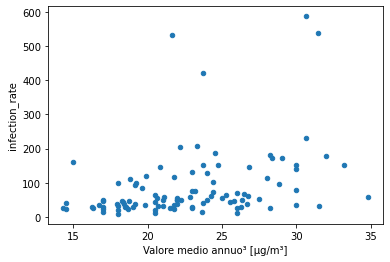

SpearmanrResult(correlation=0.46218495508694174, pvalue=1.0076675647577948e-06)
(0.364975496580668, 0.0001621948010356304)
KendalltauResult(correlation=0.3240744847950217, pvalue=1.5342544927598213e-06)


In [10]:
#PM10/COVID CORRELATION
PM10_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))
print(stats.pearsonr(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))
print(stats.kendalltau(np.array(PM10_infections['Valore medio annuo³ [µg/m³]']), np.array(PM10_infections['infection_rate'])))

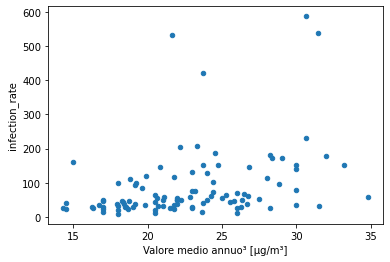

SpearmanrResult(correlation=0.46218495508694174, pvalue=1.0076675647577948e-06)
(0.364975496580668, 0.0001621948010356304)
KendalltauResult(correlation=0.3240744847950217, pvalue=1.5342544927598213e-06)


In [11]:
#PM25/COVID CORRELATION
PM25_infections.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='infection_rate')
plt.show()
print(stats.spearmanr(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))
print(stats.pearsonr(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))
print(stats.kendalltau(np.array(PM25_infections['Valore medio annuo³ [µg/m³]']), np.array(PM25_infections['infection_rate'])))